# Tutorial for *CYCLUS*: Nuclear Fuel Cycle Simulator 

<img src="img/cyclus_img.gif" width="400">

[*CYCLUS*](http://fuelcycle.org/) is an open source nuclear fuel cycle simulator. Through the use of agents and its user-customizable archetypes (called prototypes), cyclus  allows for freedom in fidelity, depth, and focus of the simulation.
<br><br>
The prior tutorial employed very simple dynamics. To fully appreciate CYCLUS, lets model a more complex scenario. In this tutorial we will run a previously made *CYCLUS* input file, default_input_file.xml, which models the European Fuel Cycle. 

❖ **Learning Objectives**

-   Use *CYCLUS* to simulate default_input_file.xml 
-   Utilize cyutils (*CYCLUS* analysis package) to analyze the *CYCLUS* output file


# Excerise 1
### Viewing the *CYCLUS* input file:
This first exercise will view a more complicated *CYCLUS* input file


To begin, let's import the necesary packages.

In [2]:
from pyne import nucname
import cyutils
from cyutils import analysis
from cyutils import write
from cyutils import economics
import matplotlib.pyplot as plt
import numpy as np
from numpy import isclose

Usage: python write_input.py [csv][init_date] [duration] [output_file_name]


In [6]:
with open('default_input_file.xml','r') as maininput:
    print(maininput.read())

<!--
This input file simulates
the scenario used in the Synergistic
Spent Fuel Dynamics in the European Union
by Jin Whan Bae, Clifford Singer, and Kathryn Huff.
-->

<simulation>
  <control>
    <duration>2280</duration>
    <startmonth>1</startmonth>
    <startyear>1970</startyear>
    <decay>manual</decay>
  </control>

  <archetypes>
    <spec>
      <lib>cycamore</lib>
      <name>Source</name>
    </spec>
    <spec>
      <lib>cycamore</lib>
      <name>Sink</name>
    </spec>
    <spec>
        <lib>cycamore</lib>
        <name>Reactor</name>
    </spec>
    <spec>
      <lib>agents</lib>
      <name>NullRegion</name>
    </spec>
    <spec>
      <lib>agents</lib>
      <name>NullInst</name>
    </spec>
    <spec>
      <lib>cycamore</lib>
      <name>DeployInst</name>
    </spec>
    <spec>
      <lib>cycamore</lib>
      <name>Separations</name>
    </spec>
    <spec>
      <lib>cycamore</lib>
      <name>Enrichment</name>
    </spec>
    <spec>
      <lib>cycamore</lib>
     

As seen above, the input xml file is much longer and more detailed than the previous simulation's input file!
Taking a glance at this input file shows that:

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `duration`      | `2280`  | length of simulation (months) |
| `start_month`      | `1` | start month of simulation |
| `start_year`     | `1970` | start year of simulation |
| `decay`   | `'never'`  | radioactive decay |


# Excerise 2
### Running the Simulation:
*CYCLUS* can be run using a single terminal command, given below. The cell will run this command for you, but it's also possible to remove the ! and directly run it in the terminal

In [1]:
# CYCLUS will not overwrite an old file - delete the old version if you run a simulation again and put
# the output to the same filename
! rm eu_future.sqlite
! cyclus default_input_file.xml -o eu_future.sqlite
# this is a command that can be executed in your terminal, without the ! . The -o flag is used to
# set the name of the output file.  Without it, the default is "cyclus.sqlite"

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject

# Exercise 3
### Analyze the results:

*CYCLUS* creates a .sqlite file as its output.  SQL is a database file type that consists of a series of tables.  A few functions have been included in cyutils.analysis.py to pull information from the sqlite database and create figures.<br><br>
An sqlite database can be opened and its contents viewed, but these database browsers often aren't helpful. Importing the data into an external function and manipulating it would provide more useful information. However, it can still be helpful to open and view the tables.


First, a cursor that points to the sqlite file is created:

In [4]:
cur = analysis.cursor('eu_future.sqlite')
init_year, init_month, duration, timestep = analysis.simulation_timesteps(cur)

### Total Power Plot of all the European Countries
#### Ask: What is the total capacity and number of reactors per country?
#### Ask: Why did this simulation take longer to run?


To find out, lets use the `plot_power` function!

In [5]:
# get number of reactors and capacity timeseries
analysis.plot_power(cur)

french_facilities has no values
Sink_Source_Inst has no values
french_facilities has no values
Sink_Source_Inst has no values


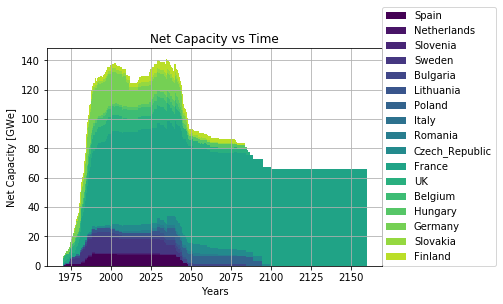

In [8]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

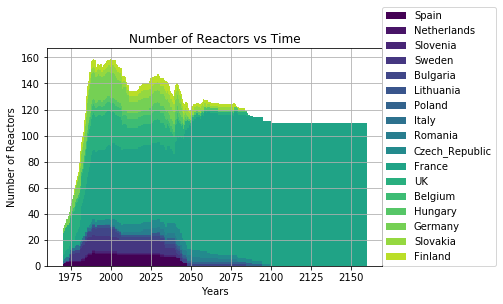

In [9]:
from IPython.display import Image
Image(filename='num_plot.png')

### Ask: How can we get the power data for France? What about france's fuel usage over time?


In [11]:
# just france

parentid = cur.execute('SELECT agentid FROM agententry WHERE '
                       'Prototype LIKE "%france%" '
                       'AND Kind = "Inst"').fetchone()
entry_exit = cur.execute('SELECT max(value), timeseriespower.agentid, '
                         'parentid, entertime, prototype, entertime + lifetime'
                         ' FROM agententry '
                         'INNER JOIN timeseriespower '
                         'ON agententry.agentid = timeseriespower.agentid '
                         'WHERE parentid = %i '
                         'GROUP BY timeseriespower.agentid' %parentid[0]).fetchall()

init_year, init_month, duration, timestep = analysis.simulation_timesteps(cur)
dictionary = {}
lwr_cap = 0
astrid_cap = 0
dictionary['lwr'] = []
dictionary['astrid'] = []
for t in timestep:
    for agent in entry_exit:
        if (agent['entertime'] == t) and agent['prototype'] == 'astrid':
            astrid_cap += agent['max(value)'] * 0.001
        if (agent['entertime'] == t) and agent['prototype'] != 'astrid':
            lwr_cap += agent['max(value)'] * 0.001
        
        if (agent['entertime + lifetime'] == t) and agent['prototype'] == 'astrid':
            astrid_cap -= agent['max(value)'] * 0.001
        if (agent['entertime + lifetime'] == t) and agent['prototype'] != 'astrid':
            lwr_cap -= agent['max(value)'] * 0.001
    dictionary['lwr'].append(lwr_cap)
    dictionary['astrid'].append(astrid_cap)

for i in range(len(dictionary['lwr'])):
    print(dictionary['lwr'][i] + dictionary['astrid'][i])
    
analysis.stacked_bar_chart(dictionary, timestep,
                  'Years', 'Net_Capacity [GWe]',
                  'Net Capacity vs Time',
                  'france_power_plot', init_year)
            

0
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.2349999999999999
1.7
1.7
1.7
1.7
1.7
1.7
1.7
1.7
1.7
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
2.24
3.12
3.12
3.12
3.12
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.91
4.91
4.91
4.91
5.82
5.82
5.82
5.82
5.82
5.82
6.7
6.7
6.7
6.7
7.58
7.58
7.58
7.58
7.58
7.58
7.58
7.58
10.295000000000002
10.295000000000002
10.295000000000002
10.295000000000002
10.295000000000002
12.120000000000001
12.120000000000001
12.120000000000001
12.120000000000001
14.835


66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.00000000000011
66.0000000

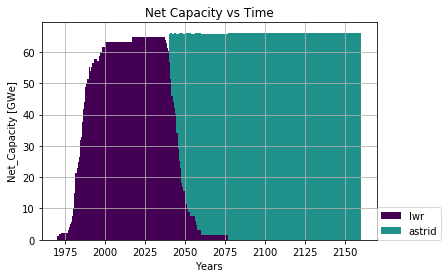

In [12]:
from IPython.display import Image
Image(filename='france_power_plot.png')

Let's take a look at the total mass of spent nuclear fuel stored at the Nuclear Waste Repository.
To plot, use the `analysis.plot_in_flux_cumulative(cur, facility, title)` function. 
<div class="alert alert-info">
**Interactive Input**
<br/>
Using the table below, create the following variables.  Include appropriate comments.
</div>

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `facility`      | `'NuclearRepository'` | facility of interest |
| `title`     | `'Cumulative Isotope Inventory of Repository'` | title of plot |


In [16]:
# astrid deployment number per timestep
parentid = cur.execute('SELECT agentid FROM agententry WHERE '
                       'Prototype LIKE "%france%" '
                       'AND Kind = "Inst"').fetchone()
entry_exit = cur.execute('SELECT max(value), timeseriespower.agentid, '
                         'parentid, entertime, prototype, entertime + lifetime'
                         ' FROM agententry '
                         'INNER JOIN timeseriespower '
                         'ON agententry.agentid = timeseriespower.agentid '
                         'WHERE parentid = %i '
                         'GROUP BY timeseriespower.agentid' %parentid[0]).fetchall()

init_year, init_month, duration, timestep = analysis.simulation_timesteps(cur)
dictionary = {}

cum_dict = {}
num_dict = {}
cum_dict['cum'] = []
num_dict['num'] = []
astrid_cum = 0
for t in timestep:
    astrid_num = 0
    for agent in entry_exit:
        if (agent['entertime'] == t) and agent['prototype'] == 'astrid':
            astrid_num += 1
            astrid_cum += 1
        
        if (agent['entertime + lifetime'] == t) and agent['prototype'] == 'astrid':
            astrid_cum -= 1

    cum_dict['cum'].append(astrid_cum)
    num_dict['num'].append(astrid_num)

analysis.double_axis_bar_line_plot(num_dict, cum_dict, timestep,
                             'Years', 'Number of SFRs Deployed', ' Number of SFRs Operational',
                             'Build number and cumulative ASTRID Number vs Time', 'sfr_deploy',
                             init_year)

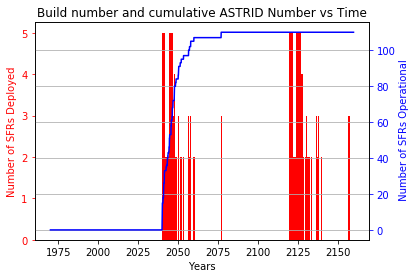

In [17]:
from IPython.display import Image
Image(filename='cum_sfr_deploy.png')


In [19]:
#tailings timeseries both cumulative and non-cumulative up till 2050

agent_ids = analysis.agent_ids(cur, 'Storage')
tails_dict = analysis.facility_commodity_flux(cur, agent_ids, ['tails'], False)
tails_dict['tails'] = tails_dict['tails'][:960]
tails_no_cum = analysis.facility_commodity_flux(cur, agent_ids, ['tails'], False, False)
tails_no_cum['tails'] = tails_no_cum['tails'][:960]
analysis.double_axis_bar_line_plot(tails_no_cum, tails_dict, timestep[:960], 'Years', 'Monthly Discharge Mass [MTHM]', 'Cumulative Mass [MTHM]',
                    'Tails Mass vs Time', 'tailings', init_year)

print('Total Tails in MTHM:')
print(max(tails_dict['tails']))

Total Tails in MTHM:
979463.892175


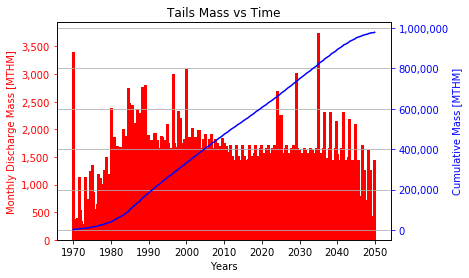

In [20]:
from IPython.display import Image
Image(filename='tails_tailings.png')


In [22]:
# get total fuel mass vs time plot up until 2150
fuels = analysis.plot_fuel(cur, ['uox', 'mox'], True)


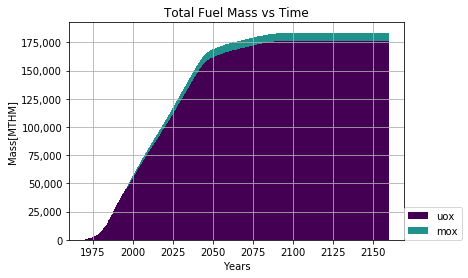

In [23]:
from IPython.display import Image
Image(filename='total_fuel.png')

In [24]:
# get astrid fuel discharge vs time plot

analysis.plot_commodity(cur,'storage',['astrid_unf'],is_outflux=False,is_cum=True)

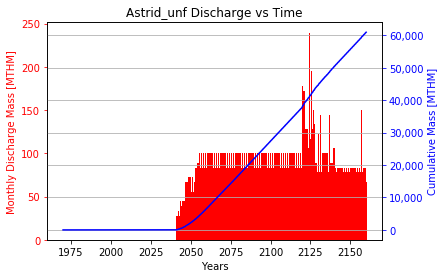

In [25]:
from IPython.display import Image
Image(filename='cum_mass_astrid_unfdischarge.png')

### Ask: Where does astrid fuel come from?

In [27]:
init_year, init_month, duration, timestep = analysis.simulation_timesteps(cur)

agent_ids = analysis.agent_ids(cur, 'Reactor')
astrid_loading = analysis.facility_commodity_flux(cur, agent_ids, ['astrid_fuel_legacy', 'astrid_fuel_new'], False, False)

print('Total ASTRID fuel from spent UOX:')
print(sum(astrid_loading['astrid_fuel_legacy']))
print('Total ASTRID fuel from spent ASTRID fuel:')
print(sum(astrid_loading['astrid_fuel_new']))

Total ASTRID fuel from spent UOX:
2873.088
Total ASTRID fuel from spent ASTRID fuel:
60529.728


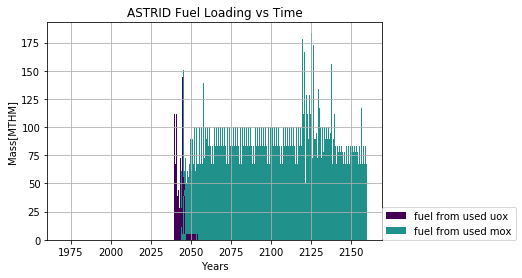

In [29]:
import collections
new_dict = collections.OrderedDict()
new_dict = {'fuel from used uox': astrid_loading['astrid_fuel_legacy'],
            'fuel from used mox': astrid_loading['astrid_fuel_new']}
analysis.stacked_bar_chart(new_dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'ASTRID Fuel Loading vs Time',
                  'where_fuel',
                  init_year)
from IPython.display import Image
Image(filename='where_fuel.png')